In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [46]:
# Limpando a pasta twitter para ter apenas as arestas
for arquivo in os.listdir("twitter"):
    extensao = os.path.splitext(arquivo)[1]
    if extensao in ['.circles', '.egofeat', '.feat', '.featnames']:
        os.remove(os.path.join("twitter", arquivo))

In [23]:
data = "twitter"
G = nx.DiGraph() # Grafo direcionado

for arquivo in os.listdir(data):
    vertice_ego = arquivo.split(".")[0]
    vertices = [vertice_ego]
    caminho_arquivo = os.path.join(data, arquivo)
    with open(caminho_arquivo, 'r') as f:
        for linha in f:
            aresta = linha.strip().split()
            if len(aresta) == 2:
                vertice1, vertice2 = aresta
                vertices.append(vertice1)
                vertices.append(vertice2)
                if G.has_edge(vertice1, vertice2):
                    G[vertice1][vertice2]['weight'] += 1
                else:
                    G.add_edge(vertice1, vertice2, weight=1)
        
    for vertice in vertices:
        if G.has_edge(vertice_ego, vertice):
            G[vertice_ego][vertice]['weight'] += 1
        else:
            G.add_edge(vertice_ego, vertice, weight=1)

print(f"Grafo criado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas.")
# Salva o grafo em formato GEXF no diretorio atual do projeto
nx.write_gexf(G, "grafo.gexf")

Grafo criado com 76269 nós e 1763477 arestas.


In [17]:
def subgrafo_por_arestas(G, num_edges=2000):
    """Seleciona um subconjunto aleatório de arestas e mantém os nós conectados a elas."""
    amostra_nos = random.sample(list(G.edges()), min(num_edges, len(G.edges())))
    
    # Criar um subgrafo apenas com as arestas escolhidas
    G_sample = nx.Graph()
    G_sample.add_edges_from(amostra_nos)

    return G_sample

# Defina quantas arestas deseja manter
qtd_arestas = 2000
G_sample = subgrafo_por_arestas(G, num_edges=qtd_arestas)

print(f"Grafo amostrado com {G_sample.number_of_nodes()} nós e {G_sample.number_of_edges()} arestas.")


Grafo amostrado com 2873 nós e 1996 arestas.


In [18]:
# Detecção de comunidade com louvain ou girvan-newman
# Início do relatório no overleaf

def girvan_newman(G):
    """ Detecção de comunidades usando o algoritmo Girvan-Newman."""
    generator = nx.algorithms.community.girvan_newman(G)
    comunidades = []
    for comunidade in next(generator):
        comunidades.append(list(comunidade))
    print(f"Gerador Girvan-Newman: {len(comunidades)} comunidades detectadas.")

    return comunidades

In [19]:
def louvain(G):
    """ Detecção de comunidades usando o algoritmo Louvain."""
    partition = nx.algorithms.community.louvain_communities(G)
    # Mapeamento de nós para comunidades
    comunidades = [list(comunidade) for comunidade in partition]
    print(f"Gerador Louvain: {len(comunidades)} comunidades detectadas.")

    return comunidades

In [20]:
comunidades_girvan_newman = girvan_newman(G_sample)
comunidades_louvain = louvain(G_sample)

# Cores para plotar os gráficos
paleta = sns.color_palette('pastel', max(len(comunidades_girvan_newman), len(comunidades_louvain)))
mapa_cores = {i: paleta[i] for i in range(len(paleta))}

cores_girvan_newman = []
for vertice in G_sample:
    for idx, grupo in enumerate(comunidades_girvan_newman):
        if vertice in grupo:
            cores_girvan_newman.append(mapa_cores[idx])
            break
    else:
        cores_girvan_newman.append("gray")

cores_louvain = []
for vertice in G_sample:
    for idx, grupo in enumerate(comunidades_louvain):
        if vertice in grupo:
            cores_louvain.append(mapa_cores[idx])
            break
    else:
        cores_louvain.append("gray")

Gerador Girvan-Newman: 882 comunidades detectadas.
Gerador Louvain: 882 comunidades detectadas.


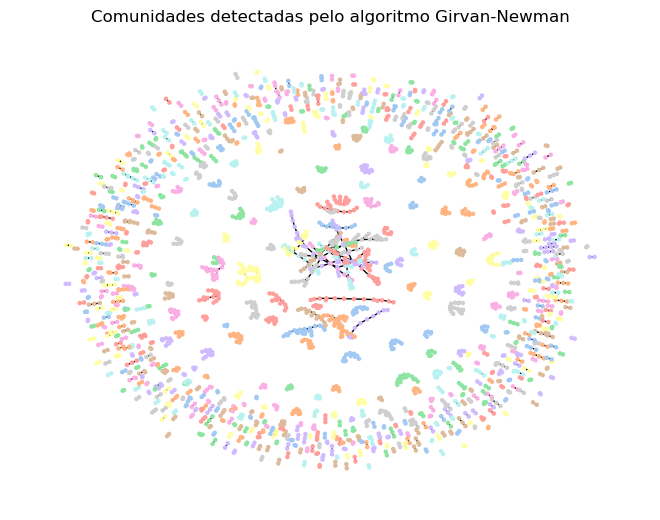

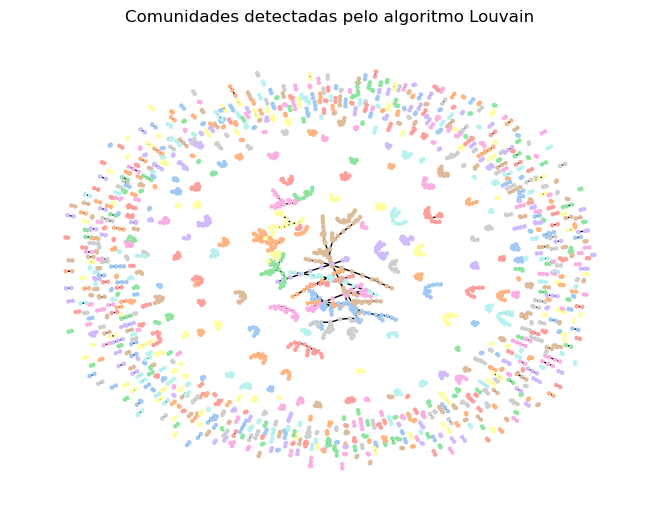

In [21]:
nx.draw(G_sample, node_color=cores_girvan_newman, node_size=5)
plt.title("Comunidades detectadas pelo algoritmo Girvan-Newman")
plt.show()

nx.draw(G_sample, node_color=cores_louvain, node_size=5)
plt.title("Comunidades detectadas pelo algoritmo Louvain")
plt.show()
